In [ ]:
!pip install yfinance
!pip install pandas_ta

!pip install outlier_utils


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 KB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218921 sha256=d151cbff4ab6c864cba349ef07c05e2746262a70e5f9108467cba39f96663d04
  Stored in directory: /root/.cache/pip/wheels/1e/5c/47/759b32beb377aee150eb4c1f1b2b7635032cc19ea09ce076fd
Successfully built pandas_ta
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_ta as pta
import seaborn as sns
import yfinance as yf
from outliers import smirnov_grubbs as grubbs
import matplotlib.pyplot as plt
import math

In [ ]:
def MovingAverage(df, fun):
   # df.loc[:, f"{fun.__name__.upper()}_5"] = fun(
   #     high=df["High"], low=df["Low"], close=df["Close"], open=df["Open"], volume=df["Volume"], length=5
   # )

   # df.loc[:, f"{fun.__name__.upper()}_20"] = fun(
   #     high=df["High"], low=df["Low"], close=df["Close"], open=df["Open"], volume=df["Volume"], length=20
   # )
   # df.loc[:, f"{fun.__name__.upper()}_50"] = fun(
   #     high=df["High"], low=df["Low"], close=df["Close"], open=df["Open"], volume=df["Volume"], length=50
   # )

    #df.loc[:, f"{fun.__name__.upper()}_150"] = fun(
     #    high=df["High"], low=df["Low"], close=df["Close"], open=df["Open"], volume=df["Volume"], length=150
    # )

    df.loc[:, f"{fun.__name__.upper()}_200"] = fun(
        high=df["High"], low=df["Low"], close=df["Close"], open=df["Open"], volume=df["Volume"], length=200
     )
    pass

    return df

In [ ]:
def HVIDYA_Calculation(df,day):
    df['Returns'] = np.log(df['Close'] / df['Close'].shift(1))
    df['HV'] = df['Returns'].rolling(window=day).std() * np.sqrt(day)

    # Calculate weighted moving averages based on historical volatility
    weights = np.exp(np.linspace(-1, 0, day))
    weights /= weights.sum()
    ma = np.convolve(df['Close'], weights, mode='full')[:len(df['Close'])]
    alpha = 1
    df['HVIDYA_'+str(day)] = ma * (1 - alpha *  df['HV']) + df['Close'].shift(1) * (alpha * df['HV'])
    return df
  

In [ ]:
ticker = yf.Ticker('^GSPC')
df = ticker.history(period='5y')
df = HVIDYA_Calculation(df,200)

In [ ]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Returns,HV,HVIDYA_200
Date,,,,,,,,,,
2018-04-09 00:00:00-04:00,2617.179932,2653.550049,2610.790039,2613.159912,3076140000,0.0,0.0,NaN,NaN,NaN
2018-04-10 00:00:00-04:00,2638.409912,2665.449951,2635.780029,2656.870117,3579130000,0.0,0.0,0.016589,NaN,NaN
2018-04-11 00:00:00-04:00,2643.889893,2661.429932,2639.250000,2642.189941,3054520000,0.0,0.0,-0.005541,NaN,NaN
2018-04-12 00:00:00-04:00,2653.830078,2674.719971,2653.830078,2663.989990,3045330000,0.0,0.0,0.008217,NaN,NaN
2018-04-13 00:00:00-04:00,2676.899902,2680.260010,2645.050049,2656.300049,2988540000,0.0,0.0,-0.002891,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-03-31 00:00:00-04:00,4056.179932,4110.750000,4056.179932,4109.310059,4525120000,0.0,0.0,0.014333,0.193150,3952.883779
2023-04-03 00:00:00-04:00,4102.200195,4127.660156,4098.790039,4124.509766,4234700000,0.0,0.0,0.003692,0.192664,3965.444482
2023-04-04 00:00:00-04:00,4128.029785,4133.129883,4086.870117,4100.600098,4227800000,0.0,0.0,-0.005814,0.189812,3969.922614


In [ ]:
df = MovingAverage(df,pta.sma)

df = MovingAverage(df,pta.ema)

df = MovingAverage(df,pta.wma)



In [ ]:
df


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Returns,HV,HVIDYA_200,SMA_200,EMA_200,WMA_200
Date,,,,,,,,,,,,,
2018-04-09 00:00:00-04:00,2617.179932,2653.550049,2610.790039,2613.159912,3076140000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-10 00:00:00-04:00,2638.409912,2665.449951,2635.780029,2656.870117,3579130000,0.0,0.0,0.016589,NaN,NaN,NaN,NaN,NaN
2018-04-11 00:00:00-04:00,2643.889893,2661.429932,2639.250000,2642.189941,3054520000,0.0,0.0,-0.005541,NaN,NaN,NaN,NaN,NaN
2018-04-12 00:00:00-04:00,2653.830078,2674.719971,2653.830078,2663.989990,3045330000,0.0,0.0,0.008217,NaN,NaN,NaN,NaN,NaN
2018-04-13 00:00:00-04:00,2676.899902,2680.260010,2645.050049,2656.300049,2988540000,0.0,0.0,-0.002891,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31 00:00:00-04:00,4056.179932,4110.750000,4056.179932,4109.310059,4525120000,0.0,0.0,0.014333,0.193150,3952.883779,3935.552113,3999.863695,3949.653206
2023-04-03 00:00:00-04:00,4102.200195,4127.660156,4098.790039,4124.509766,4234700000,0.0,0.0,0.003692,0.192664,3965.444482,3937.224712,4001.103955,3951.533382
2023-04-04 00:00:00-04:00,4128.029785,4133.129883,4086.870117,4100.600098,4227800000,0.0,0.0,-0.005814,0.189812,3969.922614,3939.393862,4002.093966,3953.159008


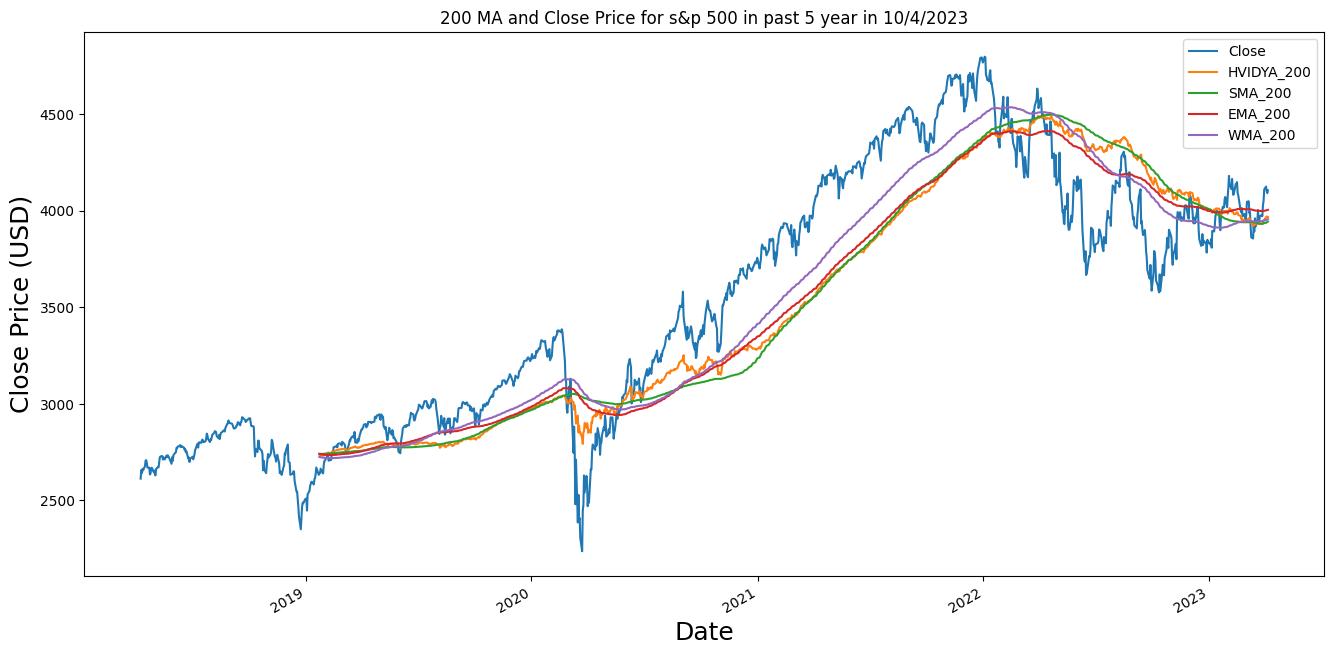

In [ ]:
plt.figure(figsize=(16,8))
plt.title('200 MA and Close Price for s&p 500 in past 5 year (10/4/2023)')
df['Close'].plot(label="Close")
df['HVIDYA_200'].plot(label="HVIDYA_200")
df['SMA_200'].plot(label="SMA_200")
df['EMA_200'].plot(label="EMA_200")
df['WMA_200'].plot(label="WMA_200")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.legend()

In [ ]:
MA_col = df.drop(
    [
        "Open",
        "High",
        "Low",
        "Volume",
        "Dividends",
        "Stock Splits",
        "Returns",
        "HV",
        "Close"
    ],
    axis=1,
).columns
MA_df = df.loc[:, MA_col]
MA_df
corr = MA_df.corr()
corr



,HVIDYA_200,SMA_200,EMA_200,WMA_200
HVIDYA_200,1.000000,0.997245,0.995583,0.987155
SMA_200,0.997245,1.000000,0.996153,0.989147
EMA_200,0.995583,0.996153,1.000000,0.995027
WMA_200,0.987155,0.989147,0.995027,1.000000


In [ ]:
normalized_df = (MA_df - MA_df.mean()) / MA_df.std()
normalized_df
corr = normalized_df.corr()
corr

,HVIDYA_200,SMA_200,EMA_200,WMA_200
HVIDYA_200,1.000000,0.997245,0.995583,0.987155
SMA_200,0.997245,1.000000,0.996153,0.989147
EMA_200,0.995583,0.996153,1.000000,0.995027
WMA_200,0.987155,0.989147,0.995027,1.000000


<Axes: >

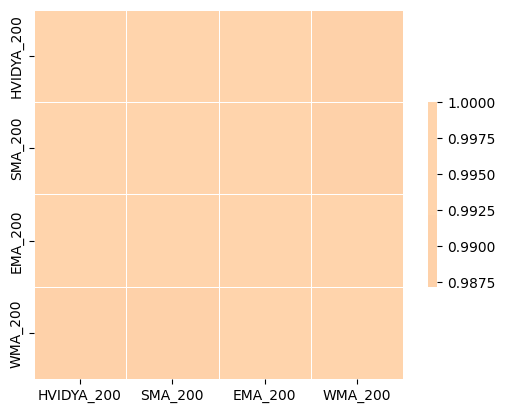

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))



# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})